In [1]:
import pandas as pd
from sklearn.metrics import plot_confusion_matrix

Meter A PSA

In [2]:
# Load and check data

dataframeA = pd.read_csv('6. Dataset PCA/MeterA_pca.csv')
#display(dataframeA.head())
dataframeA.head()

dataframeA = dataframeA.drop('Unnamed: 0', axis=1)

PCA_A_DF = dataframeA[['PC1','PC2']]

# yLbl is Class Attruibute labels

yLbl = dataframeA[['Class Attruibute']]

#featuresVector
PCA_A_DF

,PC1,PC2
0,3.260141,-2.019053
1,2.522897,-1.183668
2,1.417243,-1.047656
3,0.170745,-1.351670
4,-0.003489,-1.337765
...,...,...
78,-0.939126,2.472891
79,-0.924759,2.613474
80,-1.578888,2.270228
81,-1.168676,1.980522


In [3]:
###########################################################
# Create the Training and Test set with split 70:30 
##########################################################

from sklearn.model_selection import train_test_split
PCA_A_train, PCA_A_test, yLbl_train, yLbl_test = train_test_split(PCA_A_DF, yLbl, test_size=0.3, random_state=12)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score

In [4]:
print("Training Set")
PCA_A_train

Training Set


,PC1,PC2
61,-1.970874,-0.580092
26,-1.437275,-0.601019
10,-1.416539,-0.934425
79,-0.924759,2.613474
78,-0.939126,2.472891
77,-0.357974,2.777650
41,0.337190,-0.030662
54,0.174495,-1.245530
39,0.477607,0.146737
36,0.372692,0.251641


In [5]:
print("Testing Set -30%")
PCA_A_test 

Testing Set -30%


,PC1,PC2
17,3.161152,-0.874699
19,1.621657,-0.279962
43,-2.013132,0.301588
47,-1.462822,0.688947
12,-1.154813,-0.284567
8,1.315489,-0.949043
44,-1.661067,0.326766
23,0.753765,-0.841173
14,-1.769969,-0.506172
7,0.492671,-1.204590


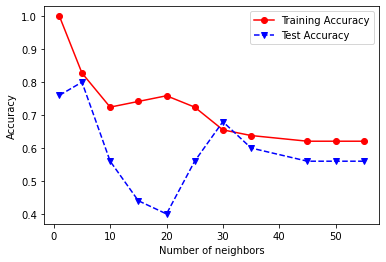

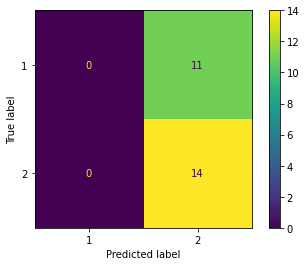

Root Mean Square Error:

0.6633249580710799


In [6]:
# next, we'll apply a knn algorithm to see (in terms of proximity) how close are the values in our pca to observations that have a stroke

# Use a nearest neighbor classifier to evaluate the methods
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30,35, 45, 50,55]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(PCA_A_train,yLbl_train.values.ravel())
    PCA_A_predTrain = clf1.predict(PCA_A_train)
    PCA_A_predTest = clf1.predict(PCA_A_test)
    trainAcc.append(accuracy_score(yLbl_train, PCA_A_predTrain))
    testAcc.append(accuracy_score(yLbl_test, PCA_A_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

plot_confusion_matrix(clf1, PCA_A_test, yLbl_test)
plt.show()

from sklearn.metrics import mean_squared_error
import math
 
MSE = mean_squared_error(yLbl_test, PCA_A_predTest)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

For Meter B


In [7]:
# Load and check data

dataframeB = pd.read_csv('6. Dataset PCA/MeterB_pca.csv')
#display(dataframeA.head())
dataframeB.head()

dataframeB = dataframeB.drop('Unnamed: 0', axis=1)

PCA_B_DF = dataframeB[['PC1','PC2']]

# yLbl is Class Attruibute labels

yLbl_B = dataframeB[['Class Attruibute']]

#featuresVector
PCA_B_DF

,PC1,PC2
0,-0.517006,-2.287902
1,-0.568945,-2.238254
2,-0.546921,-2.257404
3,-0.555591,-2.235918
4,-0.530154,-2.280878
...,...,...
63,-0.612061,1.350095
64,-0.583182,1.276827
65,-0.685925,1.286320
66,-0.756724,1.338792


In [8]:
###########################################################
# Create the Training and Test set with split 70:30 
##########################################################

from sklearn.model_selection import train_test_split
PCA_B_train, PCA_B_test, yLbl_B_train, yLbl_B_test = train_test_split(PCA_B_DF, yLbl_B, test_size=0.3, random_state=12)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score

In [9]:
print("Training Set For B")
PCA_B_train

Training Set For B


,PC1,PC2
51,-1.066769,0.915871
4,-0.530154,-2.280878
1,-0.568945,-2.238254
38,-1.096499,1.103372
15,-0.666808,-2.122724
24,0.550110,-0.808827
29,-0.162196,-1.827773
46,-1.204426,1.043712
42,-1.263897,1.090005
67,-0.413888,1.325592


In [10]:
print("Testing Set For B")
PCA_B_test

Testing Set For B


,PC1,PC2
19,1.322612,-0.033006
7,-0.584066,-2.190592
17,-0.681259,-2.111759
54,-1.147573,1.052089
65,-0.685925,1.286320
61,-0.614876,1.248063
58,-0.940378,3.646240
8,-0.610850,-2.161846
43,-1.130436,0.983223
21,8.249179,-0.280718


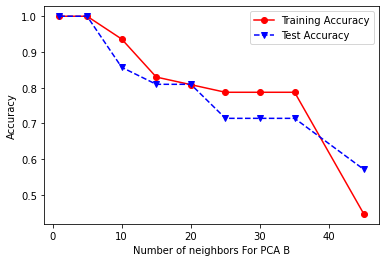

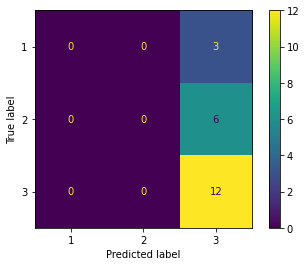

Root Mean Square Error:

0.9258200997725514


In [11]:
# next, we'll apply a knn algorithm to see (in terms of proximity) how close are the values in our pca to observations that have a stroke

# Use a nearest neighbor classifier to evaluate the methods

numNeighbors_B = [1, 5, 10, 15, 20, 25, 30,35, 45]
trainAccB = []
testAccB = []

for k in numNeighbors_B:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(PCA_B_train,yLbl_B_train.values.ravel())
    PCA_B_predTrain = clf1.predict(PCA_B_train)
    PCA_B_predTest = clf1.predict(PCA_B_test)
    trainAccB.append(accuracy_score(yLbl_B_train, PCA_B_predTrain))
    testAccB.append(accuracy_score(yLbl_B_test, PCA_B_predTest))

plt.plot(numNeighbors_B, trainAccB, 'ro-', numNeighbors_B, testAccB,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors For PCA B')
plt.ylabel('Accuracy')

plot_confusion_matrix(clf1, PCA_B_test, yLbl_B_test)
plt.show()

MSE = mean_squared_error(yLbl_B_test, PCA_B_predTest)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

In [12]:
# Load and check data

dataframeC = pd.read_csv('6. Dataset PCA/MeterC_pca.csv')
#display(dataframeA.head())
dataframeC.head()

dataframeC = dataframeC.drop('Unnamed: 0', axis=1)

PCA_C_DF = dataframeC[['PC1','PC2']]

# yLbl is Class Attruibute labels

yLbl_C = dataframeC[['Class Attruibute']]

#featuresVector
PCA_C_DF

,PC1,PC2
0,0.002733,0.129016
1,-0.058746,0.012368
2,-0.059996,-0.001635
3,-0.122002,-0.011378
4,0.003959,0.028298
...,...,...
147,-0.138944,-0.558095
148,-0.029921,-0.316254
149,0.009146,-0.145003
150,0.020766,-0.049907


In [13]:
###########################################################
# Create the Training and Test set with split 70:30 
##########################################################

from sklearn.model_selection import train_test_split
PCA_C_train, PCA_C_test, yLbl_C_train, yLbl_C_test = train_test_split(PCA_C_DF, yLbl_C, test_size=0.3, random_state=20)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score

In [14]:
print("Training Set For C")
PCA_C_train

Training Set For C


,PC1,PC2
2,-0.059996,-0.001635
5,-0.023600,0.022370
51,-0.019911,-0.270600
49,-0.060782,-0.246275
72,-0.737516,1.570253
...,...,...
75,-0.011571,0.054106
148,-0.029921,-0.316254
137,0.105742,-0.158261
15,-0.298695,-0.487869


In [15]:
print("Testing Set For C")
PCA_C_test

Testing Set For C


,PC1,PC2
112,-0.092247,-0.120789
66,0.863155,-4.494621
106,-0.316770,-0.456697
130,0.141501,0.044305
134,0.084875,0.041872
91,-0.334977,-0.518802
122,-0.308628,-0.545358
21,-0.096186,-0.024746
84,-0.318412,-0.287996
12,-0.458053,-0.507361


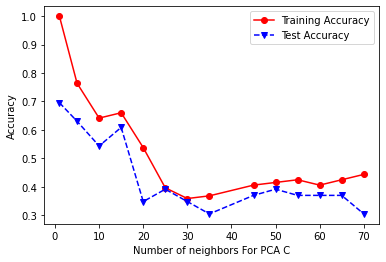

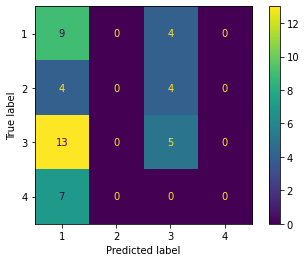

Root Mean Square Error:

1.7383150262351132


In [16]:
# next, we'll apply a knn algorithm to see (in terms of proximity) how close are the values in our pca to observations that have a stroke

# Use a nearest neighbor classifier to evaluate the methods

numNeighbors_C = [1, 5, 10, 15, 20, 25, 30,35, 45,50,55,60,65,70]
trainAccC = []
testAccC = []

for k in numNeighbors_C:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(PCA_C_train,yLbl_C_train.values.ravel())
    PCA_C_predTrain = clf1.predict(PCA_C_train)
    PCA_C_predTest = clf1.predict(PCA_C_test)
    trainAccC.append(accuracy_score(yLbl_C_train, PCA_C_predTrain))
    testAccC.append(accuracy_score(yLbl_C_test, PCA_C_predTest))

plt.plot(numNeighbors_C, trainAccC, 'ro-', numNeighbors_C, testAccC,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors For PCA C')
plt.ylabel('Accuracy')

plot_confusion_matrix(clf1, PCA_C_test, yLbl_C_test)
plt.show()

MSE = mean_squared_error(yLbl_C_test, PCA_C_predTest)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)